In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

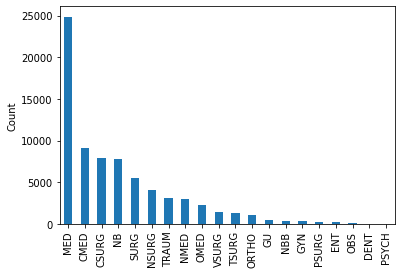

In [21]:
df_ser = pd.read_csv('files/services.csv')
plt.ylabel('Count')
#plt.title('Distribution of LOS')
df_ser['CURR_SERVICE'].value_counts().plot(kind="bar")

In [11]:
df_ser['CURR_SERVICE'].nunique()

20

In [12]:
ser_list = df_ser.groupby('HADM_ID')['CURR_SERVICE'].apply(list).reset_index()
df_stack= pd.get_dummies(ser_list['CURR_SERVICE'].apply(pd.Series).stack()).sum(level=0)
df_stack.head()

,CMED,CSURG,DENT,ENT,GU,GYN,MED,NB,NBB,NMED,NSURG,OBS,OMED,ORTHO,PSURG,PSYCH,SURG,TRAUM,TSURG,VSURG
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df_stack = df_stack.join(ser_list['HADM_ID'], how="outer")
df_stack.head()

,CMED,CSURG,DENT,ENT,GU,GYN,MED,NB,NBB,NMED,...,OBS,OMED,ORTHO,PSURG,PSYCH,SURG,TRAUM,TSURG,VSURG,HADM_ID
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,100001
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,100003
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,100006
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,100007
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100009


In [14]:
df = pd.read_csv('merge_diag_pat_proc_icu_cpt.csv')
df = df.merge(df_stack, how='inner', on='HADM_ID')
df.info()
df.to_csv('merge_diag_pat_proc_icu_cpt_ser.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58874 entries, 0 to 58873
Data columns (total 80 columns):
SUBJECT_ID                   46786 non-null float64
HADM_ID                      58874 non-null int64
ADMITTIME                    46786 non-null object
DEATHTIME                    0 non-null float64
ADMISSION_TYPE               46786 non-null object
ADMISSION_LOCATION           46786 non-null object
DISCHARGE_LOCATION           46786 non-null object
INSURANCE                    46786 non-null object
LANGUAGE                     26270 non-null object
RELIGION                     46474 non-null object
MARITAL_STATUS               46786 non-null object
ETHNICITY                    46786 non-null object
DIAGNOSIS                    46785 non-null object
LOS                          46786 non-null float64
d_blood                      46786 non-null float64
d_circulatory                46786 non-null float64
d_congenital                 46786 non-null float64
d_digestive            

In [15]:
df

,SUBJECT_ID,HADM_ID,ADMITTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,...,NSURG,OBS,OMED,ORTHO,PSURG,PSYCH,SURG,TRAUM,TSURG,VSURG
0,22.0,165315,2196-04-09 12:26:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,...,0,0,0,0,0,0,0,0,0,0
1,23.0,152223,2153-09-03 07:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,Religious,...,0,0,0,0,0,0,0,0,0,0
2,23.0,124321,2157-10-18 19:34:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,Religious,...,1,0,0,0,0,0,0,0,0,0
3,24.0,161859,2139-06-06 16:14:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,Religious,...,0,0,0,0,0,0,0,0,0,0
4,25.0,129635,2160-11-02 02:06:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58869,NaN,177274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
58870,NaN,179303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
58871,NaN,181800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
58872,NaN,194017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58874 entries, 0 to 58873
Data columns (total 80 columns):
SUBJECT_ID                   46786 non-null float64
HADM_ID                      58874 non-null int64
ADMITTIME                    46786 non-null object
DEATHTIME                    0 non-null float64
ADMISSION_TYPE               46786 non-null object
ADMISSION_LOCATION           46786 non-null object
DISCHARGE_LOCATION           46786 non-null object
INSURANCE                    46786 non-null object
LANGUAGE                     26270 non-null object
RELIGION                     46474 non-null object
MARITAL_STATUS               46786 non-null object
ETHNICITY                    46786 non-null object
DIAGNOSIS                    46785 non-null object
LOS                          46786 non-null float64
d_blood                      46786 non-null float64
d_circulatory                46786 non-null float64
d_congenital                 46786 non-null float64
d_digestive            